# **ST1/ST1G Assignment 9 (Capstone Programming Project)**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### This Project is based on the Used Cars Price Prediction data available from Kaggle repository (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices ).


*   It contains the details of 823 cars from a range of locations.
*   My project task is to create a machine learning model which can predict the original price of car based on its usage.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Step 1: Data Reading

File Directory

In [ ]:
# save content of csv file to varible
df = pd.read_csv('/content/drive/MyDrive/Capstone project/kaggle_data/train-data.csv')
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
# Data Cleaning
print("Shape before deleting empty values", df.shape)
df = df.dropna()
df = df.drop_duplicates()
df = df.dropna().reset_index()
print("Shape after deleting empty values", df.shape)
# No duplicates in file
# df = df.drop_duplicates()
# print("Shape after deleting duplicates", df.shape)
df = df.drop(columns=['index'])
df

Shape before deleting empty values (6019, 13)
Shape after deleting empty values (823, 14)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,7.77 Lakh,4.00
819,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
820,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
821,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20


#Step 1 Observations:


*   This file contained 823 cars with completed data
*   There are 13 attributes:
  * Name - The type of car
  * Location - Current city in which the car is located
  * Year -
  * Kilometers_driven - Distance that the car has travel
  * Fuel_Type - The type of fuel that the car uses Petrol or Diesel
  * Transmission - The type of gear system Auto or Manual
  * Owner_Type - The amount of times the car was previously owned
  * Mileage - The distance the car can travel (fuel efficency)
  * Engine - How powerful the cars engine is
  * Power - How powerful the cars engine is
  * Seats - The amount of seats the car has
  * New_Price - the current price of the car
  * Price - The cars previous price



In [ ]:
def mileage_convert(x):
    if "km/kg" in x:
        x = x.replace("km/kg", "")
        return float(x)*1.40
    else:
        x = x.replace("kmpl", "")
        return float(x)

def price_convert(x):
    if "Cr" in x:
        x = x.replace("Cr", "")
        return float(x)*100
    else:
        x = x.replace("Lakh", "")
        return float(x)

df['Fuel_Type'] = df['Fuel_Type'].str.replace(r"Diesel", '1', regex=True)
df['Fuel_Type'] = df['Fuel_Type'].str.replace(r"Petrol", '2', regex=True)
df['Fuel_Type'] = df['Fuel_Type'].str.replace(r"CNG", '3', regex=True)
df['Transmission'] = df['Transmission'].str.replace(r"Manual", '1', regex=True)
df['Transmission'] = df['Transmission'].str.replace(r"Automatic", '2', regex=True)
df['Engine'] = df['Engine'].str.replace(r"CC", '', regex=True)
df['Power'] = df['Power'].str.replace(r"bhp", '', regex=True)
df['Engine'] = df['Engine'].str.replace(r"CC", '', regex=True)
df["New_Price"].apply(price_convert)
df = df.drop_duplicates()
df['New_Price'] = df['New_Price'].str.replace(r"Lakh", '', regex=True)
df['New_Price'] = df['New_Price'].str.replace(r"Cr", '', regex=True)
df["Mileage"].apply(mileage_convert)
df = df.drop_duplicates()
df['Mileage'] = df['Mileage'].str.replace(r"kmpl", '', regex=True)
df['Mileage'] = df['Mileage'].str.replace(r"km/kg", '', regex=True)

df['Fuel_Type'] = df['Fuel_Type'].astype(float)
df['Transmission'] = df['Transmission'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)
df['New_Price'] = df['New_Price'].astype(float)
df['Price'] = df['Price'].astype(float)

del df['Name']
del df['Location']
del df['Kilometers_Driven']
del df['Owner_Type']
df

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price
0,2011,2.0,1.0,18.20,1199.0,88.70,5.0,8.61,4.50
1,2016,1.0,2.0,11.36,2755.0,171.50,8.0,21.00,17.50
2,2018,2.0,1.0,21.56,1462.0,103.25,5.0,10.65,9.95
3,2014,1.0,1.0,13.50,2477.0,175.56,7.0,32.01,15.00
4,2014,1.0,2.0,22.69,1995.0,190.00,5.0,47.87,18.55
...,...,...,...,...,...,...,...,...,...
818,2016,2.0,1.0,17.57,1193.0,88.70,5.0,7.77,4.00
819,2011,2.0,1.0,16.09,1598.0,103.50,5.0,11.91,3.25
820,2016,1.0,1.0,24.30,1248.0,88.50,5.0,9.93,7.43
821,2013,2.0,1.0,18.50,1198.0,86.80,5.0,6.63,3.20


In [ ]:
df.to_csv('Used_Cars.csv', index=False)
print("File created")

File created


This file contains data about used car sales.

*   Name: The brand and model of the car
*   Location: The location where the car is being sold or is available for purchase
*   Year: The year or edition of the model.
*   Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
*   Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
*   Transmission: The type of transmission used by the car. (Automatic / Manual)
*   Owner_Type: The degree of ownership the car has
*   Mileage: The standard mileage offered by the car company in kmpl or km/kg
*   Engine: The displacement volume of the engine in CC.
*   Price: The previous price of the car
*   New_Price: The new advertised price of the car





In [ ]:
out = df.sort_values(by=['New_Price'], ascending=True)  # Sorts by "Mileage"
out.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price
75,2017,1.0,2.0,11.00,2987.0,258.00,7.0,1.00,56.00
252,2018,1.0,2.0,11.00,2987.0,258.00,7.0,1.02,79.00
51,2017,1.0,2.0,14.75,2967.0,245.00,7.0,1.04,62.67
186,2016,1.0,2.0,14.75,2967.0,245.00,7.0,1.04,67.00
287,2019,2.0,2.0,19.00,2996.0,362.07,2.0,1.06,83.96


In [ ]:
out = df.groupby('Year')["Price"].nunique()
print(out)
print("\n\n")

out = df.groupby('Mileage')["Price"].nunique()
print(out)
print("\n\n")

out = df.groupby('Engine')["Price"].nunique()
print(out)
print("\n\n")

out = df.groupby('Power')["Price"].nunique()
print(out)
print("\n\n")

out = df.groupby('Seats')["Price"].nunique()
print(out)
print("\n\n")

out = df.groupby('New_Price')["Price"].nunique()
print(out)
print("\n\n")


Year
2001      1
2004      1
2005      1
2007      1
2008      4
2009      3
2010     16
2011     21
2012     31
2013     43
2014     49
2015     63
2016    131
2017    165
2018    122
2019     58
Name: Price, dtype: int64



Mileage
0.00      4
10.00     1
11.00     2
11.05     2
11.25     1
         ..
27.40     4
28.40    26
31.79     2
32.26     1
33.54     5
Name: Price, Length: 151, dtype: int64



Engine
799.0     16
998.0     53
999.0     10
1047.0     1
1086.0     1
1186.0    10
1193.0    11
1194.0     3
1196.0    10
1197.0    71
1198.0    19
1199.0    30
1248.0    79
1364.0     8
1368.0     1
1395.0     1
1396.0     2
1461.0    17
1462.0     5
1493.0     3
1496.0     7
1497.0    33
1498.0    49
1582.0    17
1591.0    20
1595.0     1
1598.0    10
1798.0    20
1950.0     8
1956.0    13
1968.0    18
1969.0     3
1984.0     1
1991.0     2
1995.0    48
1997.0     1
1998.0     7
1999.0    13
2143.0    15
2179.0    10
2198.0     1
2393.0    16
2477.0     6
2487.0     1
2489.0     2


#Step 2: Problem statement



*   Creating a prediction model for original price of a car
*   Target Value: Price
*   Predictors: Year, Fuel_Type, Transmission, etc



#Step 3: Choosing the appropriate ML/AI Algorithm



*   Target value is Continuous = ML Regression model



#Step 4: class distribution

<Axes: >

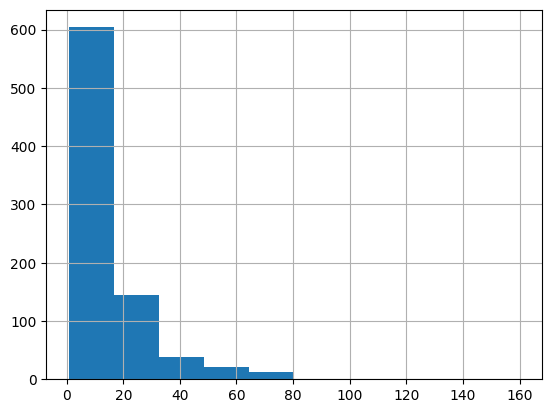

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
df['Price'].hist()

#Step 5: Basic Exploratory Data Analysis

In [ ]:
# Looking at sample rows in the data
df.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price
0,2011,2.0,1.0,18.20,1199.0,88.70,5.0,8.61,4.50
1,2016,1.0,2.0,11.36,2755.0,171.50,8.0,21.00,17.50
2,2018,2.0,1.0,21.56,1462.0,103.25,5.0,10.65,9.95
3,2014,1.0,1.0,13.50,2477.0,175.56,7.0,32.01,15.00
4,2014,1.0,2.0,22.69,1995.0,190.00,5.0,47.87,18.55


In [ ]:
# Looking at sample rows in the data
df.tail()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price
818,2016,2.0,1.0,17.57,1193.0,88.7,5.0,7.77,4.00
819,2011,2.0,1.0,16.09,1598.0,103.5,5.0,11.91,3.25
820,2016,1.0,1.0,24.30,1248.0,88.5,5.0,9.93,7.43
821,2013,2.0,1.0,18.50,1198.0,86.8,5.0,6.63,3.20
822,2014,1.0,1.0,28.40,1248.0,74.0,5.0,7.88,4.75


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          823 non-null    int64  
 1   Fuel_Type     823 non-null    float64
 2   Transmission  823 non-null    float64
 3   Mileage       823 non-null    float64
 4   Engine        823 non-null    float64
 5   Power         823 non-null    float64
 6   Seats         823 non-null    float64
 7   New_Price     823 non-null    float64
 8   Price         823 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 58.0 KB


In [ ]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,2015.869988,1.472661,1.377886,19.575589,1615.489672,120.227995,5.304982,20.328906,13.647606
std,2.378709,0.521012,0.485154,4.614245,562.811691,55.623259,0.795707,20.209032,14.860539
min,2001.000000,1.000000,1.000000,0.000000,799.000000,53.000000,2.000000,1.000000,0.700000
25%,2015.000000,1.000000,1.000000,16.770000,1197.000000,81.860000,5.000000,7.840000,5.000000
50%,2016.000000,1.000000,1.000000,19.160000,1497.000000,99.000000,5.000000,11.390000,8.200000
75%,2017.000000,2.000000,2.000000,22.690000,1995.000000,166.850000,5.000000,24.010000,17.500000
max,2019.000000,3.000000,2.000000,33.540000,4951.000000,444.000000,8.000000,99.920000,160.000000


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

,0
Year,16
Fuel_Type,3
Transmission,2
Mileage,151
Engine,58
Power,114
Seats,6
New_Price,540
Price,508


#Step 5: Observations


*   Year = Categorical
*   Fuel_Type = Categorical
*   Transmission = Categorical
*   Mileage = Continuous
*   Engine = Continuous
*   Power = Continuous
*   Seats = Categorical
*   New_Price = Continuous
*   Price = Continuous



#Step 6-7: Already Completed

#Step 8: Visual Exploratory Data Analysi

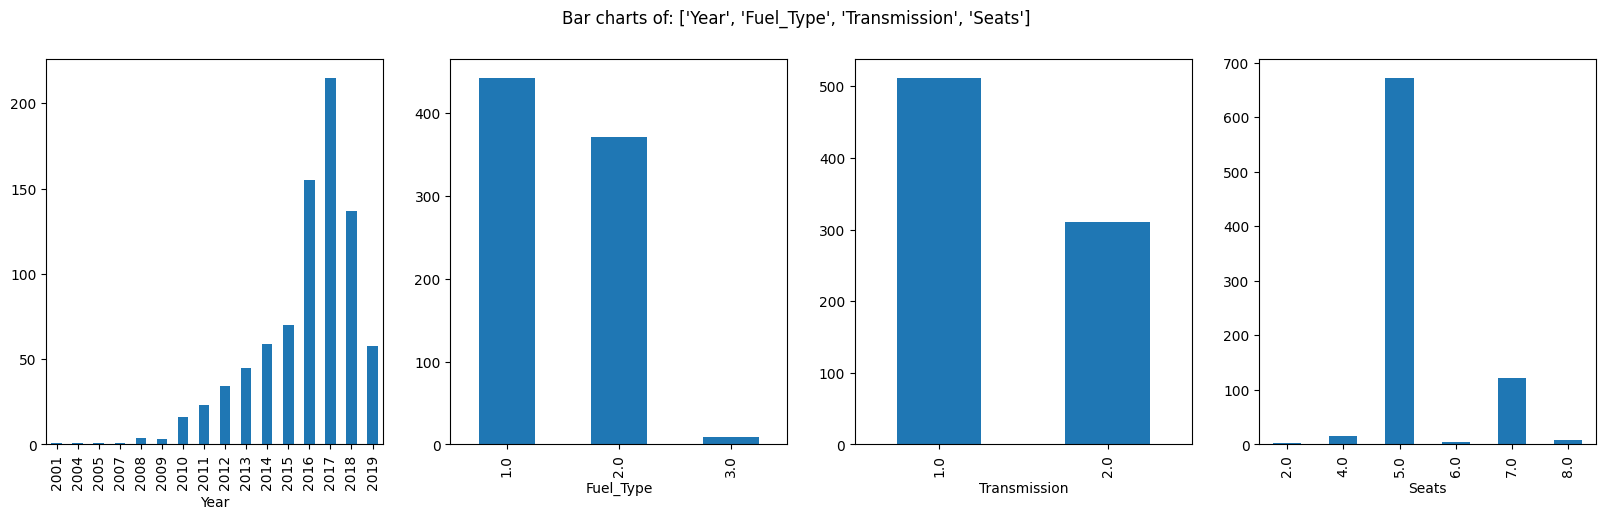

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=df, colsToPlot=['Year','Fuel_Type', 'Transmission', 'Seats'])

#Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'New_Price'}>]], dtype=object)

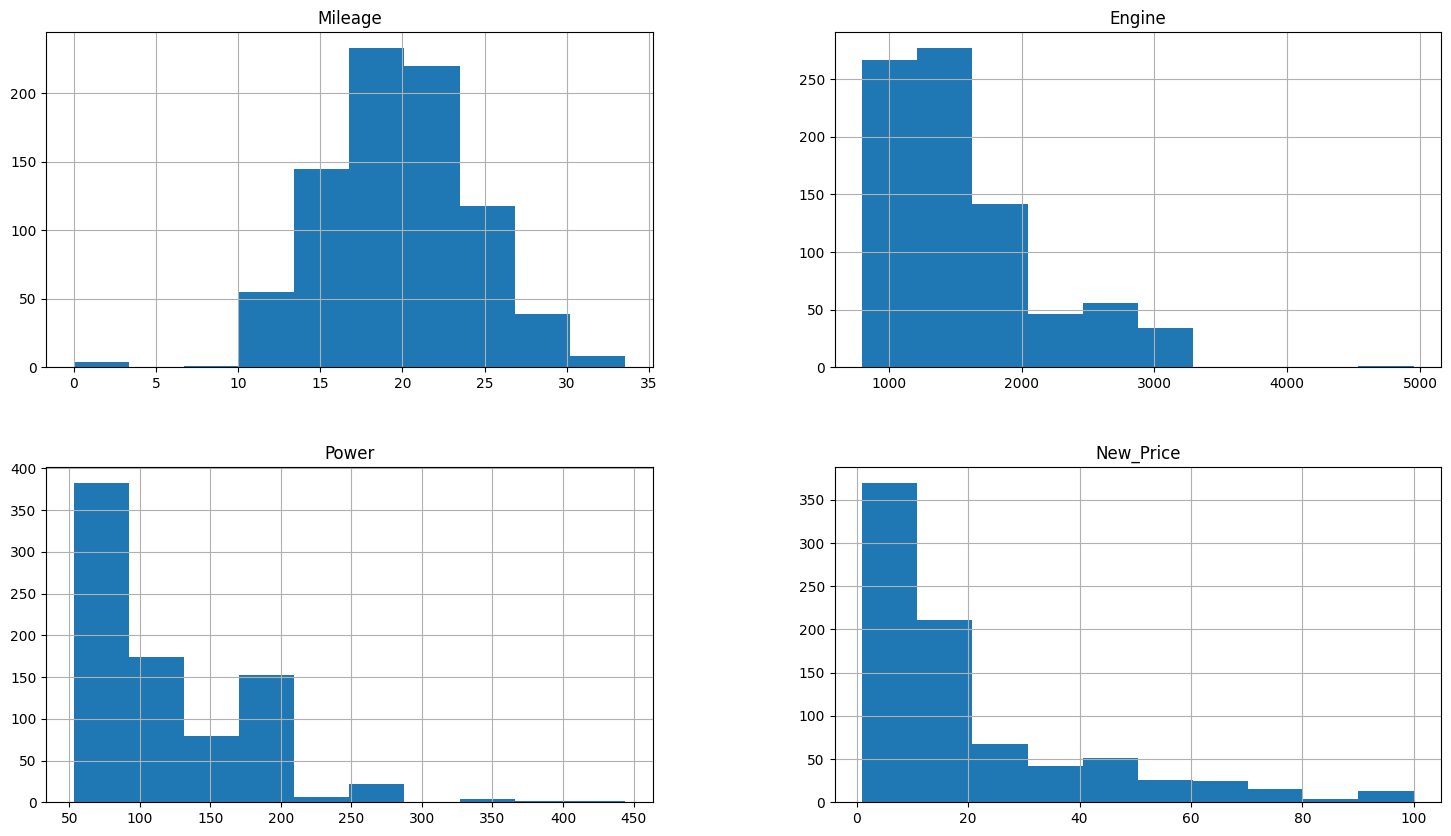

In [ ]:
# Plotting histograms of multiple columns together
df.hist(['Mileage', 'Engine', 'Power', 'New_Price'], figsize=(18,10))

#Step 9: Observation

#Step 10: Outlier Analysis

In [ ]:
#Replacing outliers for 'CRIM'
# Finding nearest values to 60 mark
df['Power'][df['Power']<450].sort_values(ascending=False)

,Power
547,444.00
26,444.00
592,395.00
66,367.00
24,362.07
...,...
432,53.30
500,53.30
786,53.30
758,53.30


## Step 11:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'Power'}>]], dtype=object)

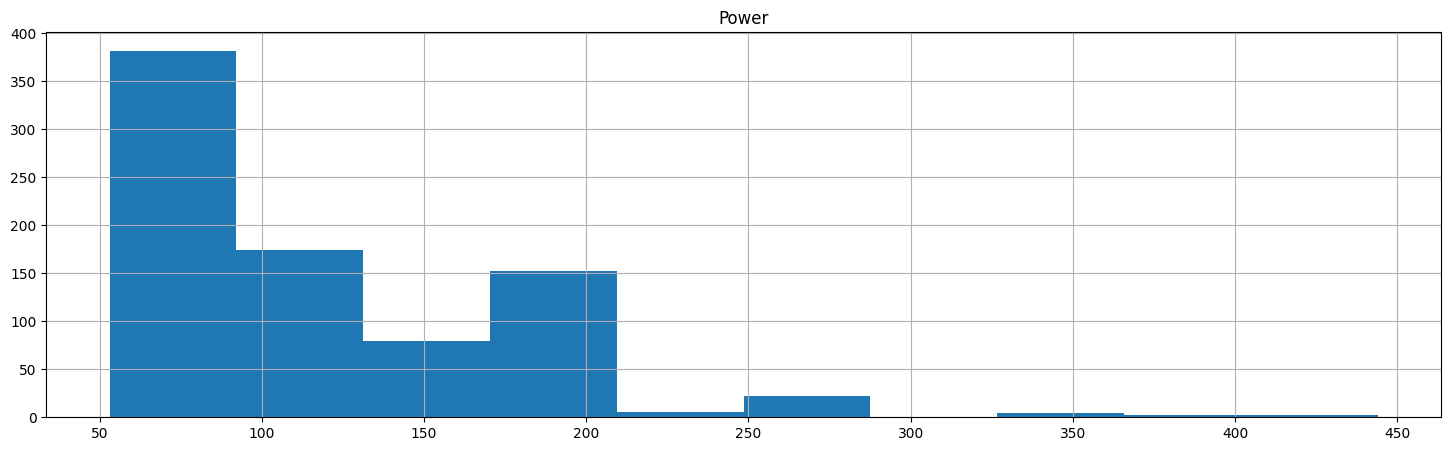

In [ ]:
df.hist(['Power'], figsize=(18,5))

#Step 11: Observations

#Step 12: Missing Values Analysis

In [ ]:
# Finding how many missing values are there for each column
df.isnull().sum()

,0
Year,0
Fuel_Type,0
Transmission,0
Mileage,0
Engine,0
Power,0
Seats,0
New_Price,0
Price,0


#Step 12: Observations



*   No missing values



#Step 13: Feature Selection

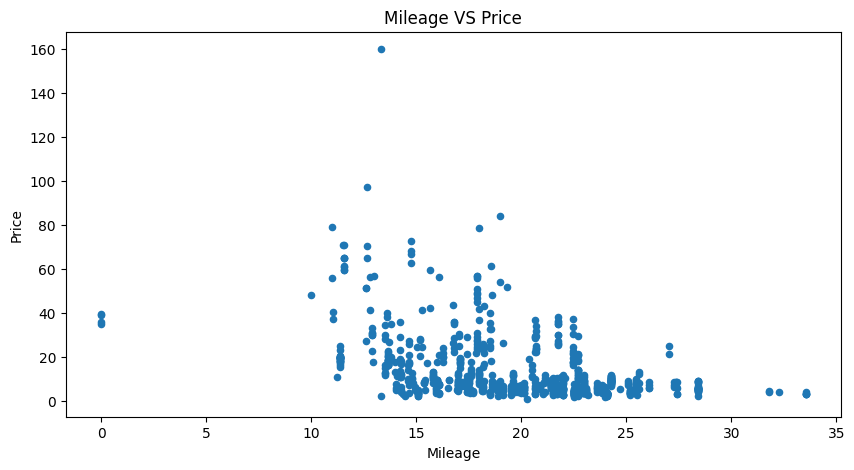

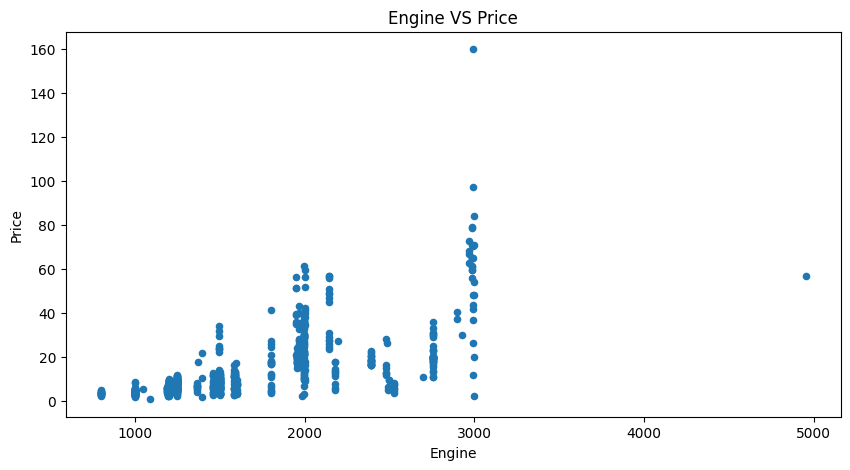

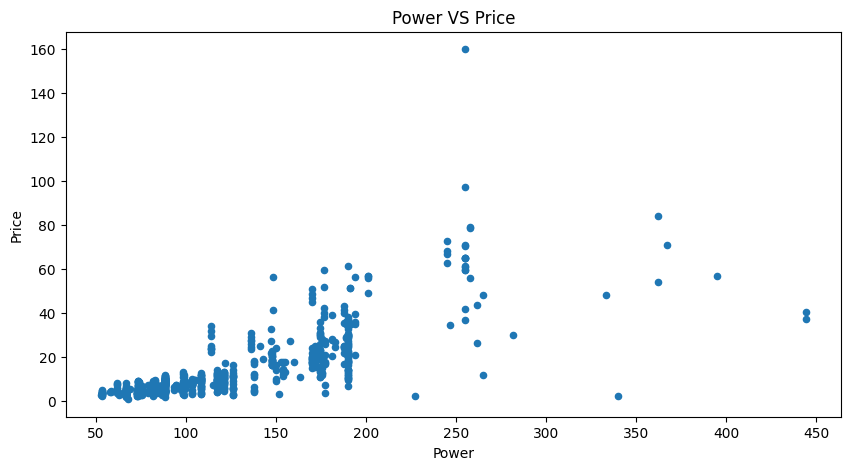

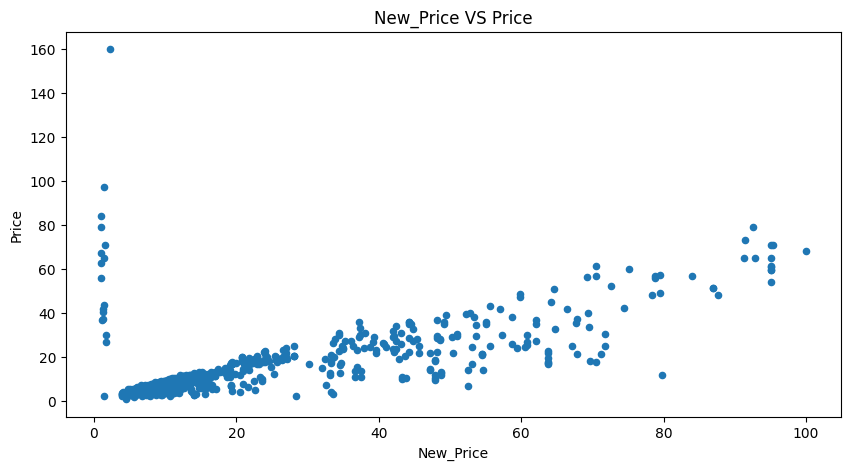

In [ ]:
ContinuousCols=['Mileage', 'Engine', 'Power', 'New_Price']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

#Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Mileage', 'Engine', 'Power', 'New_Price', 'Price']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,Mileage,Engine,Power,New_Price,Price
Mileage,1.000000,-0.633602,-0.540167,-0.328595,-0.433571
Engine,-0.633602,1.000000,0.853957,0.610121,0.696675
Power,-0.540167,0.853957,1.000000,0.716737,0.777187
New_Price,-0.328595,0.610121,0.716737,1.000000,0.686618
Price,-0.433571,0.696675,0.777187,0.686618,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

,Price
Engine,0.696675
Power,0.777187
New_Price,0.686618
Price,1.000000


#Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots

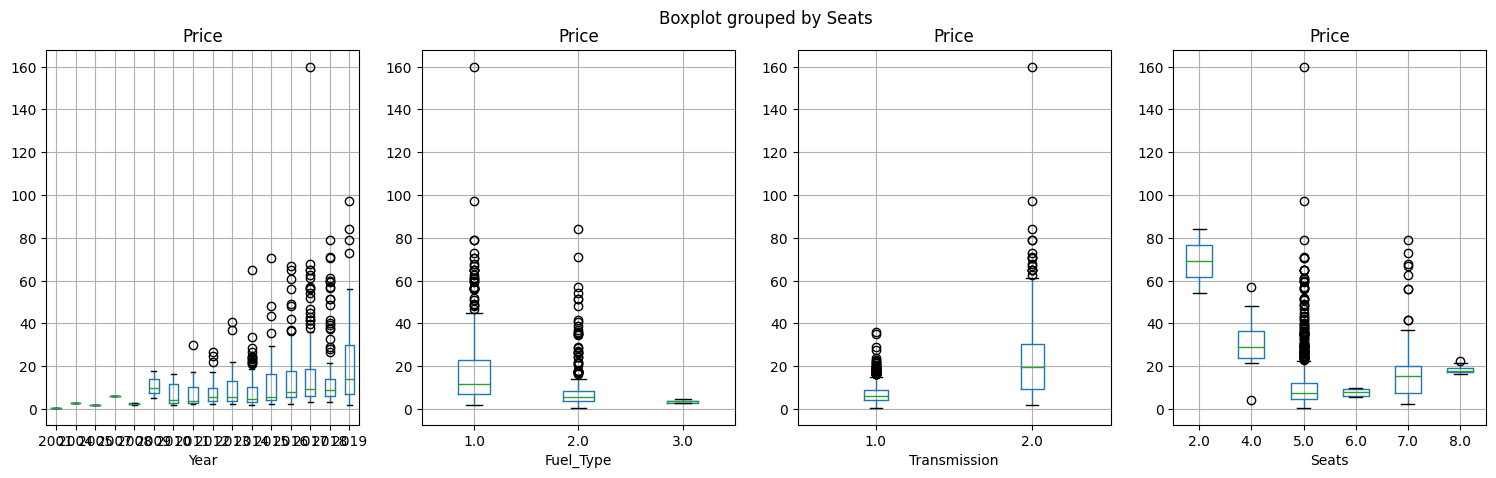

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['Year', 'Fuel_Type', 'Transmission', 'Seats']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway
  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

  return(SelectedPredictors)


#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=["Year", 'Fuel_Type', 'Transmission', "Mileage", "Engine", "Power", "Seats", "New_Price"]
FunctionAnova(inpData=df,
TargetVariable='Price',
CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Year is correlated with Price | P-Value: 7.550050487026804e-06
Fuel_Type is correlated with Price | P-Value: 1.1620390346902136e-20
Transmission is correlated with Price | P-Value: 8.683460686728253e-65
Mileage is correlated with Price | P-Value: 2.801667464393912e-160
Engine is correlated with Price | P-Value: 4.820264150485216e-223
Power is correlated with Price | P-Value: 1.6044652412076208e-230
Seats is correlated with Price | P-Value: 8.907519674579963e-13
New_Price is correlated with Price | P-Value: 7.421904452852323e-158


['Year',
 'Fuel_Type',
 'Transmission',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price']

#Selecting final Predictors

In [ ]:
SelectedColumns=["Year", 'Fuel_Type', 'Transmission', "Mileage", "Engine", "Power", "Seats", "New_Price"]

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price
0,2011,2.0,1.0,18.20,1199.0,88.70,5.0,8.61
1,2016,1.0,2.0,11.36,2755.0,171.50,8.0,21.00
2,2018,2.0,1.0,21.56,1462.0,103.25,5.0,10.65
3,2014,1.0,1.0,13.50,2477.0,175.56,7.0,32.01
4,2014,1.0,2.0,22.69,1995.0,190.00,5.0,47.87


In [ ]:
DataForML.to_pickle('DataForML.pkl')
print("Data saved")

Data saved


#Step 17: Data Pre-processing

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=df['Price']

# Printing sample rows
DataForML_Numeric.head()

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,New_Price,Price
0,2011,2.0,1.0,18.20,1199.0,88.70,5.0,8.61,4.50
1,2016,1.0,2.0,11.36,2755.0,171.50,8.0,21.00,17.50
2,2018,2.0,1.0,21.56,1462.0,103.25,5.0,10.65,9.95
3,2014,1.0,1.0,13.50,2477.0,175.56,7.0,32.01,15.00
4,2014,1.0,2.0,22.69,1995.0,190.00,5.0,47.87,18.55


#Step 18: Machine Learning Model Development:

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Year', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=["Year", 'Fuel_Type', 'Transmission', "Mileage", "Engine", "Power", "Seats", "New_Price"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#Step 19: Standardization/Normalization of data

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(247, 8)
(247,)


# **step 20**
#Linear Regression

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(x_train,y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(x_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.692643658137589

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  0.722222        0.5           0.0  0.600477  0.095857  0.073811  0.500000   
2  0.833333        0.5           1.0  0.454979  0.240607  0.344604  0.500000   
3  0.666667        0.0           0.0  0.402504  0.404143  0.313453  0.833333   
4  0.611111        0.0           0.0  0.475850  0.415222  0.023274  0.833333   

   New_Price  Price  PredictedPrice  
0   0.120097  11.50            13.0  
1   0.069248   5.50             2.0  
2   0.602406  24.50            31.0  
3   0.324404  12.75            20.0  
4   0.094218   4.30             1.0  
Mean Accuracy on test data: 38.14284023530409
Median Accuracy on test data: 66.98911729141474

Accuracy values for 10-fold Cross Validation:
 [57.11951154 51.01821027 52.53664452 53.6

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.89548812006472

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  0.722222        0.5           0.0  0.600477  0.095857  0.073811  0.500000   
2  0.833333        0.5           1.0  0.454979  0.240607  0.344604  0.500000   
3  0.666667        0.0           0.0  0.402504  0.404143  0.313453  0.833333   
4  0.611111        0.0           0.0  0.475850  0.415222  0.023274  0.833333   

   New_Price  Price  PredictedPrice  
0   0.120097  11.50             8.0  
1   0.069248   5.50             4.0  
2   0.602406  24.50            32.0  
3   0.324404  12.75             6.0  
4   0.094218   4.30             5.0  
Mean Accuracy on test data: 70.81018955891511
Median Accuracy on test data: 84.21052631578948

Accuracy values for 10-fold Cross Validation:
 

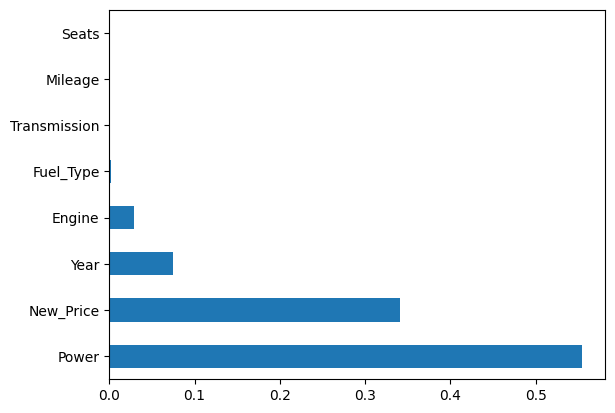

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9003449413957905

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  0.722222        0.5           0.0  0.600477  0.095857  0.073811  0.500000   
2  0.833333        0.5           1.0  0.454979  0.240607  0.344604  0.500000   
3  0.666667        0.0           0.0  0.402504  0.404143  0.313453  0.833333   
4  0.611111        0.0           0.0  0.475850  0.415222  0.023274  0.833333   

   New_Price  Price  PredictedPrice  
0   0.120097  11.50             9.0  
1   0.069248   5.50             5.0  
2   0.602406  24.50            31.0  
3   0.324404  12.75            13.0  
4   0.094218   4.30             6.0  
Mean Accuracy on test data: 69.35130830076993
Median Accuracy on test data: 85.7959961868446

Accuracy values for 10-fold 

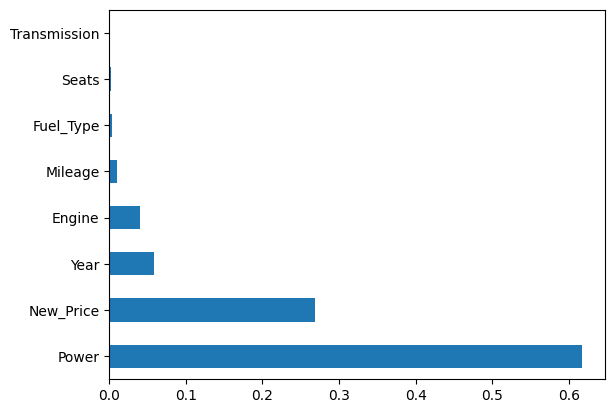

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.899889038271639

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  0.722222        0.5           0.0  0.600477  0.095857  0.073811  0.500000   
2  0.833333        0.5           1.0  0.454979  0.240607  0.344604  0.500000   
3  0.666667        0.0           0.0  0.402504  0.404143  0.313453  0.833333   
4  0.611111        0.0           0.0  0.475850  0.415222  0.023274  0.833333   

   New_Price  Price  PredictedPrice  
0   0.120097  11.50             6.0  
1   0.069248   5.50             6.0  
2   0.602406  24.50            32.0  
3   0.324404  12.75            18.0  
4   0.094218   4.30             6.0  
Mean Accuracy on test data: 50.28393787771211
Median Accuracy on test data: 73.710

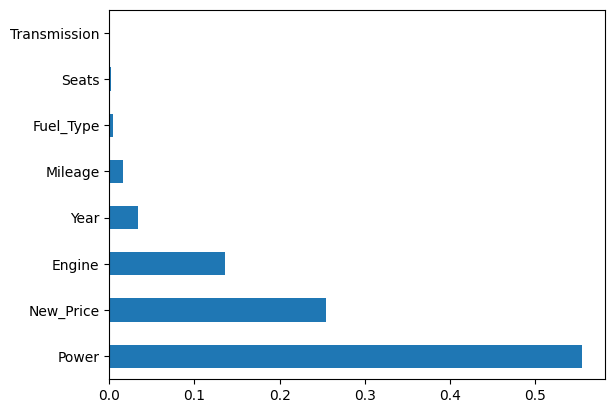

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 Value: 0.9906696201612591

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  

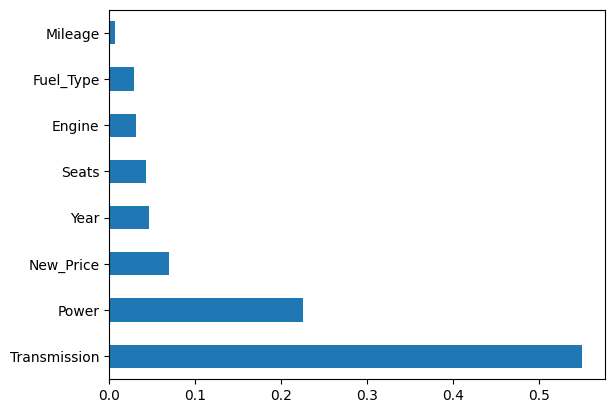

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:squarederror',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(x_train,y_train)
prediction=XGB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

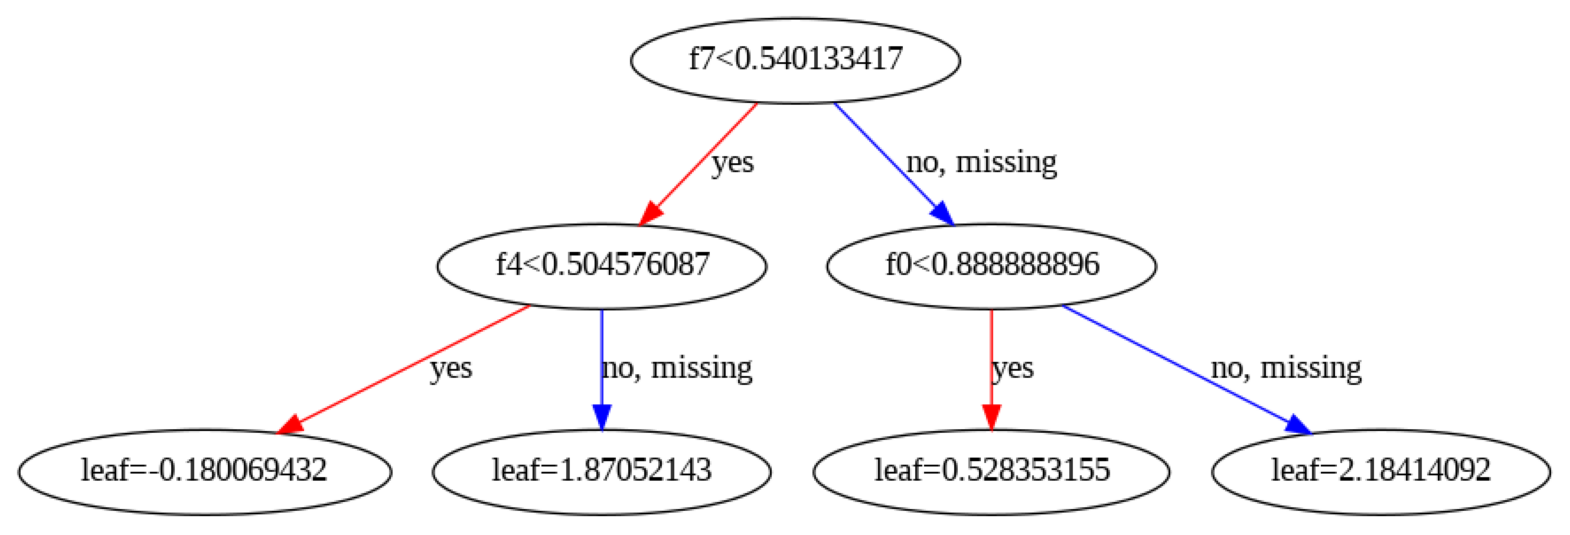

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8911250549407371

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  0.722222        0.5           0.0  0.600477  0.095857  0.073811  0.500000   
2  0.833333        0.5           1.0  0.454979  0.240607  0.344604  0.500000   
3  0.666667        0.0           0.0  0.402504  0.404143  0.313453  0.833333   
4  0.611111        0.0           0.0  0.475850  0.415222  0.023274  0.833333   

   New_Price  Price  PredictedPrice  
0   0.120097  11.50            10.0  
1   0.069248   5.50             5.0  
2   0.602406  24.50            37.0  
3   0.324404  12.75            13.0  
4   0.094218   4.30             5.0  
Mean Accuracy on test data: 80.38314683324776
Median Accuracy on test data: 88.88888888888889

Accuracy values for 10-fold Cross Validation:
 [83.50311796 84.43808417

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train,y_train)
prediction=SVM.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.5840644173169891

##### Model Validation and Accuracy Calculations ##########
       Year  Fuel_Type  Transmission   Mileage    Engine     Power     Seats  \
0  0.944444        0.0           1.0  0.724508  0.108141  0.090793  0.500000   
1  0.722222        0.5           0.0  0.600477  0.095857  0.073811  0.500000   
2  0.833333        0.5           1.0  0.454979  0.240607  0.344604  0.500000   
3  0.666667        0.0           0.0  0.402504  0.404143  0.313453  0.833333   
4  0.611111        0.0           0.0  0.475850  0.415222  0.023274  0.833333   

   New_Price  Price  PredictedPrice  
0   0.120097  11.50            11.0  
1   0.069248   5.50             4.0  
2   0.602406  24.50            26.0  
3   0.324404  12.75            17.0  
4   0.094218   4.30             7.0  
Mean Accuracy on test data: 67.25845209591387
Median Accuracy on test data: 80.0

Accuracy values for 10-fold Cross Validation:
 [71.23214844 74.88185152 71.29911176 74.63485254 7

#Step 21: Model Deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=["Year", 'Fuel_Type', 'Transmission', "Mileage", "Engine", "Power", "Seats", "New_Price"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(823, 8)
(823,)


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:squarederror',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [73.84508306 85.3369706  85.03118538 83.47227547 85.30859318 -8.65955482
 87.02927847 80.72122743 86.43798261 86.85903199]

Final Average Accuracy of the model: 74.54


#Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


#Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=["Year", 'Fuel_Type', 'Transmission', "Mileage", "Engine", "Power", "Seats", "New_Price"]

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

#Step 25: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[20, 1.0, 2.0, 20.30, 1224.0, 95.23, 5.0, 5.23],[2012, 2.0, 1.0, 28.54, 1753.0, 14.42, 7.0, 12.34]],columns=["Year", 'Fuel_Type', 'Transmission', "Mileage", "Engine", "Power", "Seats", "New_Price"])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Year  Fuel_Type  Transmission  Mileage  Engine  Power  Seats  New_Price
0    20        1.0           2.0    20.30  1224.0  95.23    5.0       5.23
1  2012        2.0           1.0    28.54  1753.0  14.42    7.0      12.34


,Prediction
0,0.337092
1,4.234650


#Desktop App deployment: Tkinter package